# Find the Flag

In this project, we’ll use decision trees to predict the continent a country is located on and its language based on several features of its flag. For instance, some of the colors are good indicators as well as the presence or absence of certain shapes could give one a hint. We’ll explore which features are the best to use and the best way to create a decision tree. The [**Flags Data Set**](https://archive.ics.uci.edu/ml/datasets/Flags) used in this project is provided by UCI’s Machine Learning Repository.

Columns description:

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

## Investigate the Data

1.Let’s start with necessary imports and uploading data from `flags.csv` to the variable `flags`.

In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np

# Imports for ml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Imports for visualisationin
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flags = pd.read_csv('flags.csv')
flags

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [3]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

In [4]:
flags.dtypes

Name          object
Landmass       int64
Zone           int64
Area           int64
Population     int64
Language       int64
Religion       int64
Bars           int64
Stripes        int64
Colors         int64
Red            int64
Green          int64
Blue           int64
Gold           int64
White          int64
Black          int64
Orange         int64
Mainhue       object
Circles        int64
Crosses        int64
Saltires       int64
Quarters       int64
Sunstars       int64
Crescent       int64
Triangle       int64
Icon           int64
Animate        int64
Text           int64
Topleft       object
Botright      object
dtype: object

In [5]:
flags.describe()

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,...,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating Features and Labels

Let's start with the first part of the goal: the prediction of the country's continent. For this matter, the `Landmass` column seems like an obvious variant for labels within this set.

In [6]:
labels1 = flags[['Landmass']]
labels1.head()

,Landmass
0,5
1,3
2,4
3,6
4,3


We have our labels. Now we want to choose which columns will help our decision tree correctly classify those labels. Let's start with the columns that contain some descriptive statistics about the flags e.g. how many colors are present on a given flag, what are they, what symbols are depicted etc. We'll try to create a model that uses only this type of information to determine the continent the country is on and will measure the accuracy score of such model. After that we'll try a different approach to feature modelling.  

In [7]:
data_flag_land = flags[['Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text']]

Now let’s split theses dataframes into a training set and test set.

In [8]:
train_data1, test_data1, train_labels1, test_labels1 = train_test_split(data_flag_land, labels1, random_state = 2)

## Make and Test the Model

We will try to fit our model on the current training data and labels and get an accuracy score based on test data and labels. They should be at least better than random guessing, which would give us right answers about 16% of the time.

In [9]:
tree_classifier1 = DecisionTreeClassifier(random_state = 1)
tree_classifier1.fit(train_data1, train_labels1) 
print('Accuracy:', round(tree_classifier1.score(test_data1, test_labels1), 2) * 100, '%')

Accuracy: 39.0 %


Our model has about `39%` We now have a good baseline of how our model performs with these features. Let’s see if we can prune the tree to make it better. 

## Tuning the Model

Decision Tree Model has a couple of good parameters that help to improve model's accuracy these are `max_depth` and `max_leaf_nodes`. By default both of them equals to `None` meaning unlimited. For `max_depth` means that nodes are expanded until all leaves are pure and for `max_leaf_nodes`: that test nodes are defined as relative reduction in impurity. Our current `max_depth` is:

In [10]:
tree_classifier1.tree_.max_depth

14

Let's find what optimal values would be for `max_depth` and `max_leaf_nodes` within our current classifier. 

In [11]:
def best_tree(train_data, train_labels, test_data, test_labels): 
    scores = []
    best_depth= 0
    best_score = 0
    best_leaf_nodes = 0
    best_classifier = None
    for current_depth in range(1,21):
        for current_leaf_nodes in range(2,101):
            current_classifier = DecisionTreeClassifier(random_state = 3, max_depth = current_depth, max_leaf_nodes = current_leaf_nodes)
            current_classifier.fit(train_data, train_labels) 
            current_score = current_classifier.score(test_data, test_labels)
            if best_score < current_score:
                scores.append(current_score)
                best_score = current_score
                best_depth = current_depth 
                best_classifier = current_classifier
                best_leaf_nodes = current_leaf_nodes
    return best_classifier, scores, best_score, best_depth, best_leaf_nodes

In [12]:
tree_classifier2, scores2, best_score2, best_depth2, best_leaf_nodes2 = best_tree(train_data1, train_labels1, test_data1, test_labels1)
print('Accuracy:', round(best_score2, 2) * 100, '%')
print('Depth:', best_depth2)
print('Maximum leaf nodes:', best_leaf_nodes2)

Accuracy: 47.0 %
Depth: 6
Maximum leaf nodes: 22


Rather than printing the score of each tree, let’s graph it! We want the x-axis to show the depth of the tree and the y-axis to show the tree’s score.

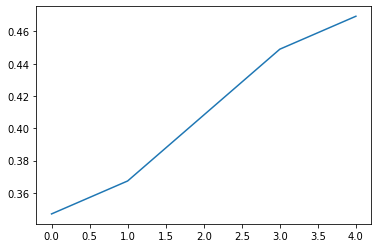

In [13]:
plt.plot(range(len(scores2)), scores2)
plt.show()

If the tree is too short, we’re underfitting and not accurately representing the training data. If the tree is too big, we’re getting too specific and relying too heavily on the training data.

In [14]:
pd.set_option('display.max_columns', None)
continent_corrs = flags.corr().head(1)
continent_corrs

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
Landmass,1.0,-0.615759,0.013279,0.10594,0.4964,0.325073,-0.13929,-0.063375,-0.062856,0.0934,0.026226,-0.177366,-0.080465,-0.004134,-0.058243,0.020744,0.065696,-0.031103,-0.003429,-0.004537,-0.034843,0.168438,-0.033154,0.030359,-0.118856,-0.110743


In [35]:
data_corr_land = flags[['Zone', 'Population', 'Language',  'Religion', 'Bars', 'Blue', 'Crescent', 'Animate', 'Text']]

In [36]:
train_data2, test_data2, train_labels2, test_labels2 = train_test_split(data_corr_land, labels1, random_state = 3)

In [37]:
tree_classifier3, scores3, best_score3, best_depth3, best_leaf_nodes3 = best_tree(train_data2, train_labels2, test_data2, test_labels2)
print('Accuracy:', round(best_score3, 2) * 100, '%')
print('Depth:', best_depth3)
print('Maximum leaf nodes:', best_leaf_nodes3)

Accuracy: 67.0 %
Depth: 10
Maximum leaf nodes: 45


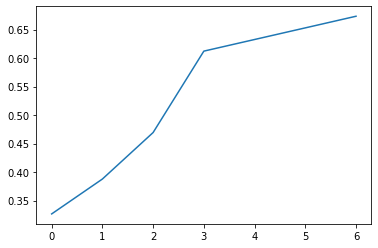

In [38]:
plt.plot(range(len(scores3)), scores3)
plt.show()

In [39]:
languages_corrs = flags.corr()[4:5]
languages_corrs

,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text
Language,0.4964,-0.618387,-0.027869,0.062804,1.0,0.422315,-0.049862,0.105409,-0.197883,-0.011048,0.006046,-0.262201,-0.189429,-0.046823,0.094465,-0.064407,0.098476,-0.210966,-0.296106,-0.220535,-0.126241,0.193375,-0.064845,0.028336,-0.133756,-0.082977


In [40]:
data_corr_lang = flags[[
    'Landmass', 'Zone', 'Population', 'Stripes', 'Colors', 'Blue', 
    'Gold', 'Crosses', 'Saltires', 'Quarters', 'Sunstars', 'Crescent', 'Animate']]

In [41]:
labels2 = flags[['Language']]
labels2.head()

,Language
0,10
1,6
2,8
3,1
4,6


In [42]:
train_data3, test_data3, train_labels3, test_labels3 = train_test_split(data_corr_lang, labels2, random_state = 3)

In [43]:
tree_classifier4, scores4, best_score4, best_depth4, best_leaf_nodes4 = best_tree(train_data3, train_labels3, test_data3, test_labels3)
print('Accuracy:', round(best_score4, 2) * 100, '%')
print('Depth:', best_depth4)
print('Maximum leaf nodes:', best_leaf_nodes4)

Accuracy: 65.0 %
Depth: 2
Maximum leaf nodes: 4


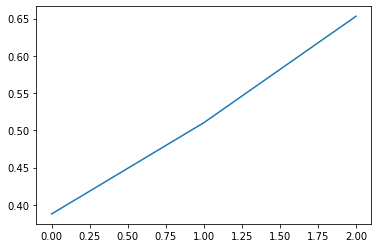

In [44]:
plt.plot(range(len(scores4)), scores4)
plt.show()